In [ ]:
# libary
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm;
import statsmodels.formula.api as ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, MinMaxScaler

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Boston/Boston.csv')

In [ ]:
data = data.drop('Unnamed: 0', axis = 1)
data

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

# 선형 회귀 모델 적용 가능성 검토

In [ ]:
def heatmap(dataset):
    cmap = plt.cm.PuBu
    corr = dataset.corr()
    plt.figure(figsize=(20, 16)) 
    plt.title("Person Correlation of Features", y = 1.05, size = 15) 
    sns.heatmap(corr, linewidths = 0.1, 
                vmax = 1.0, 
                square = True, 
                cmap = cmap, 
                linecolor = "white", 
                annot = True, 
                annot_kws = {"size" : 16})

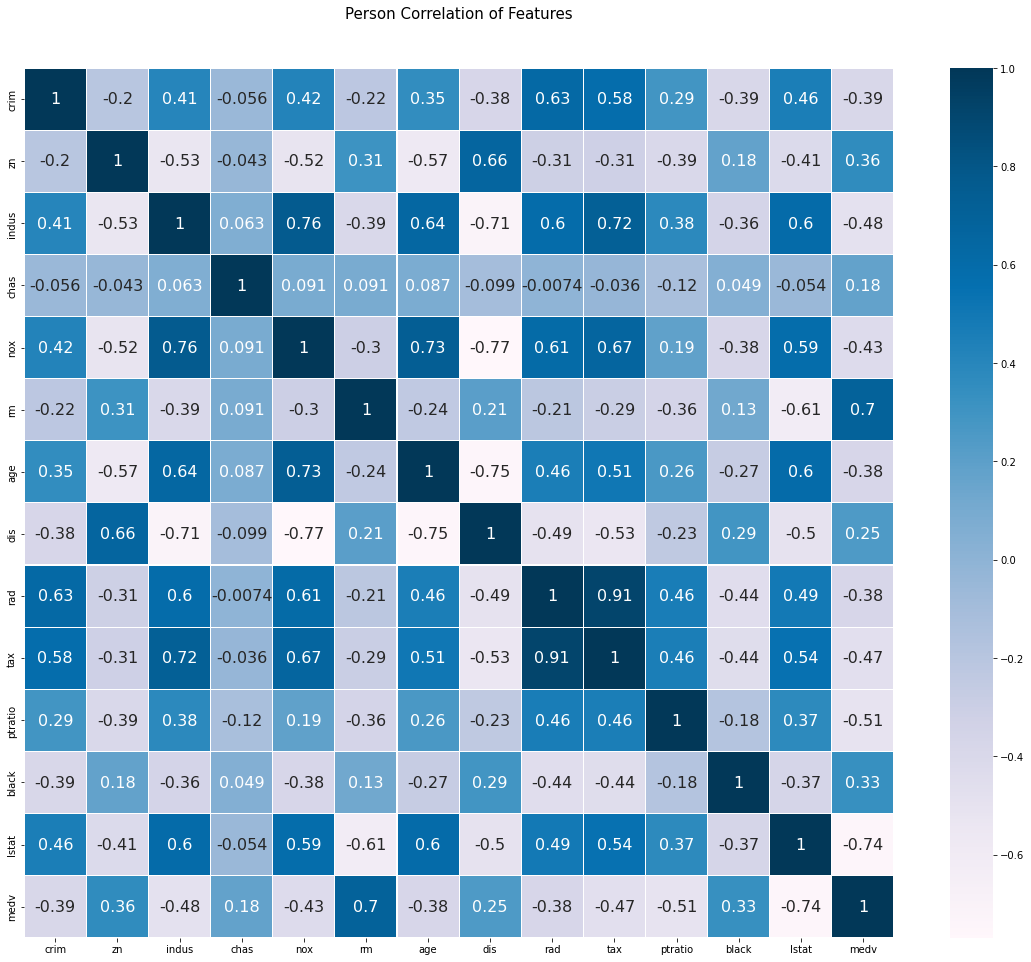

In [ ]:
heatmap(data)

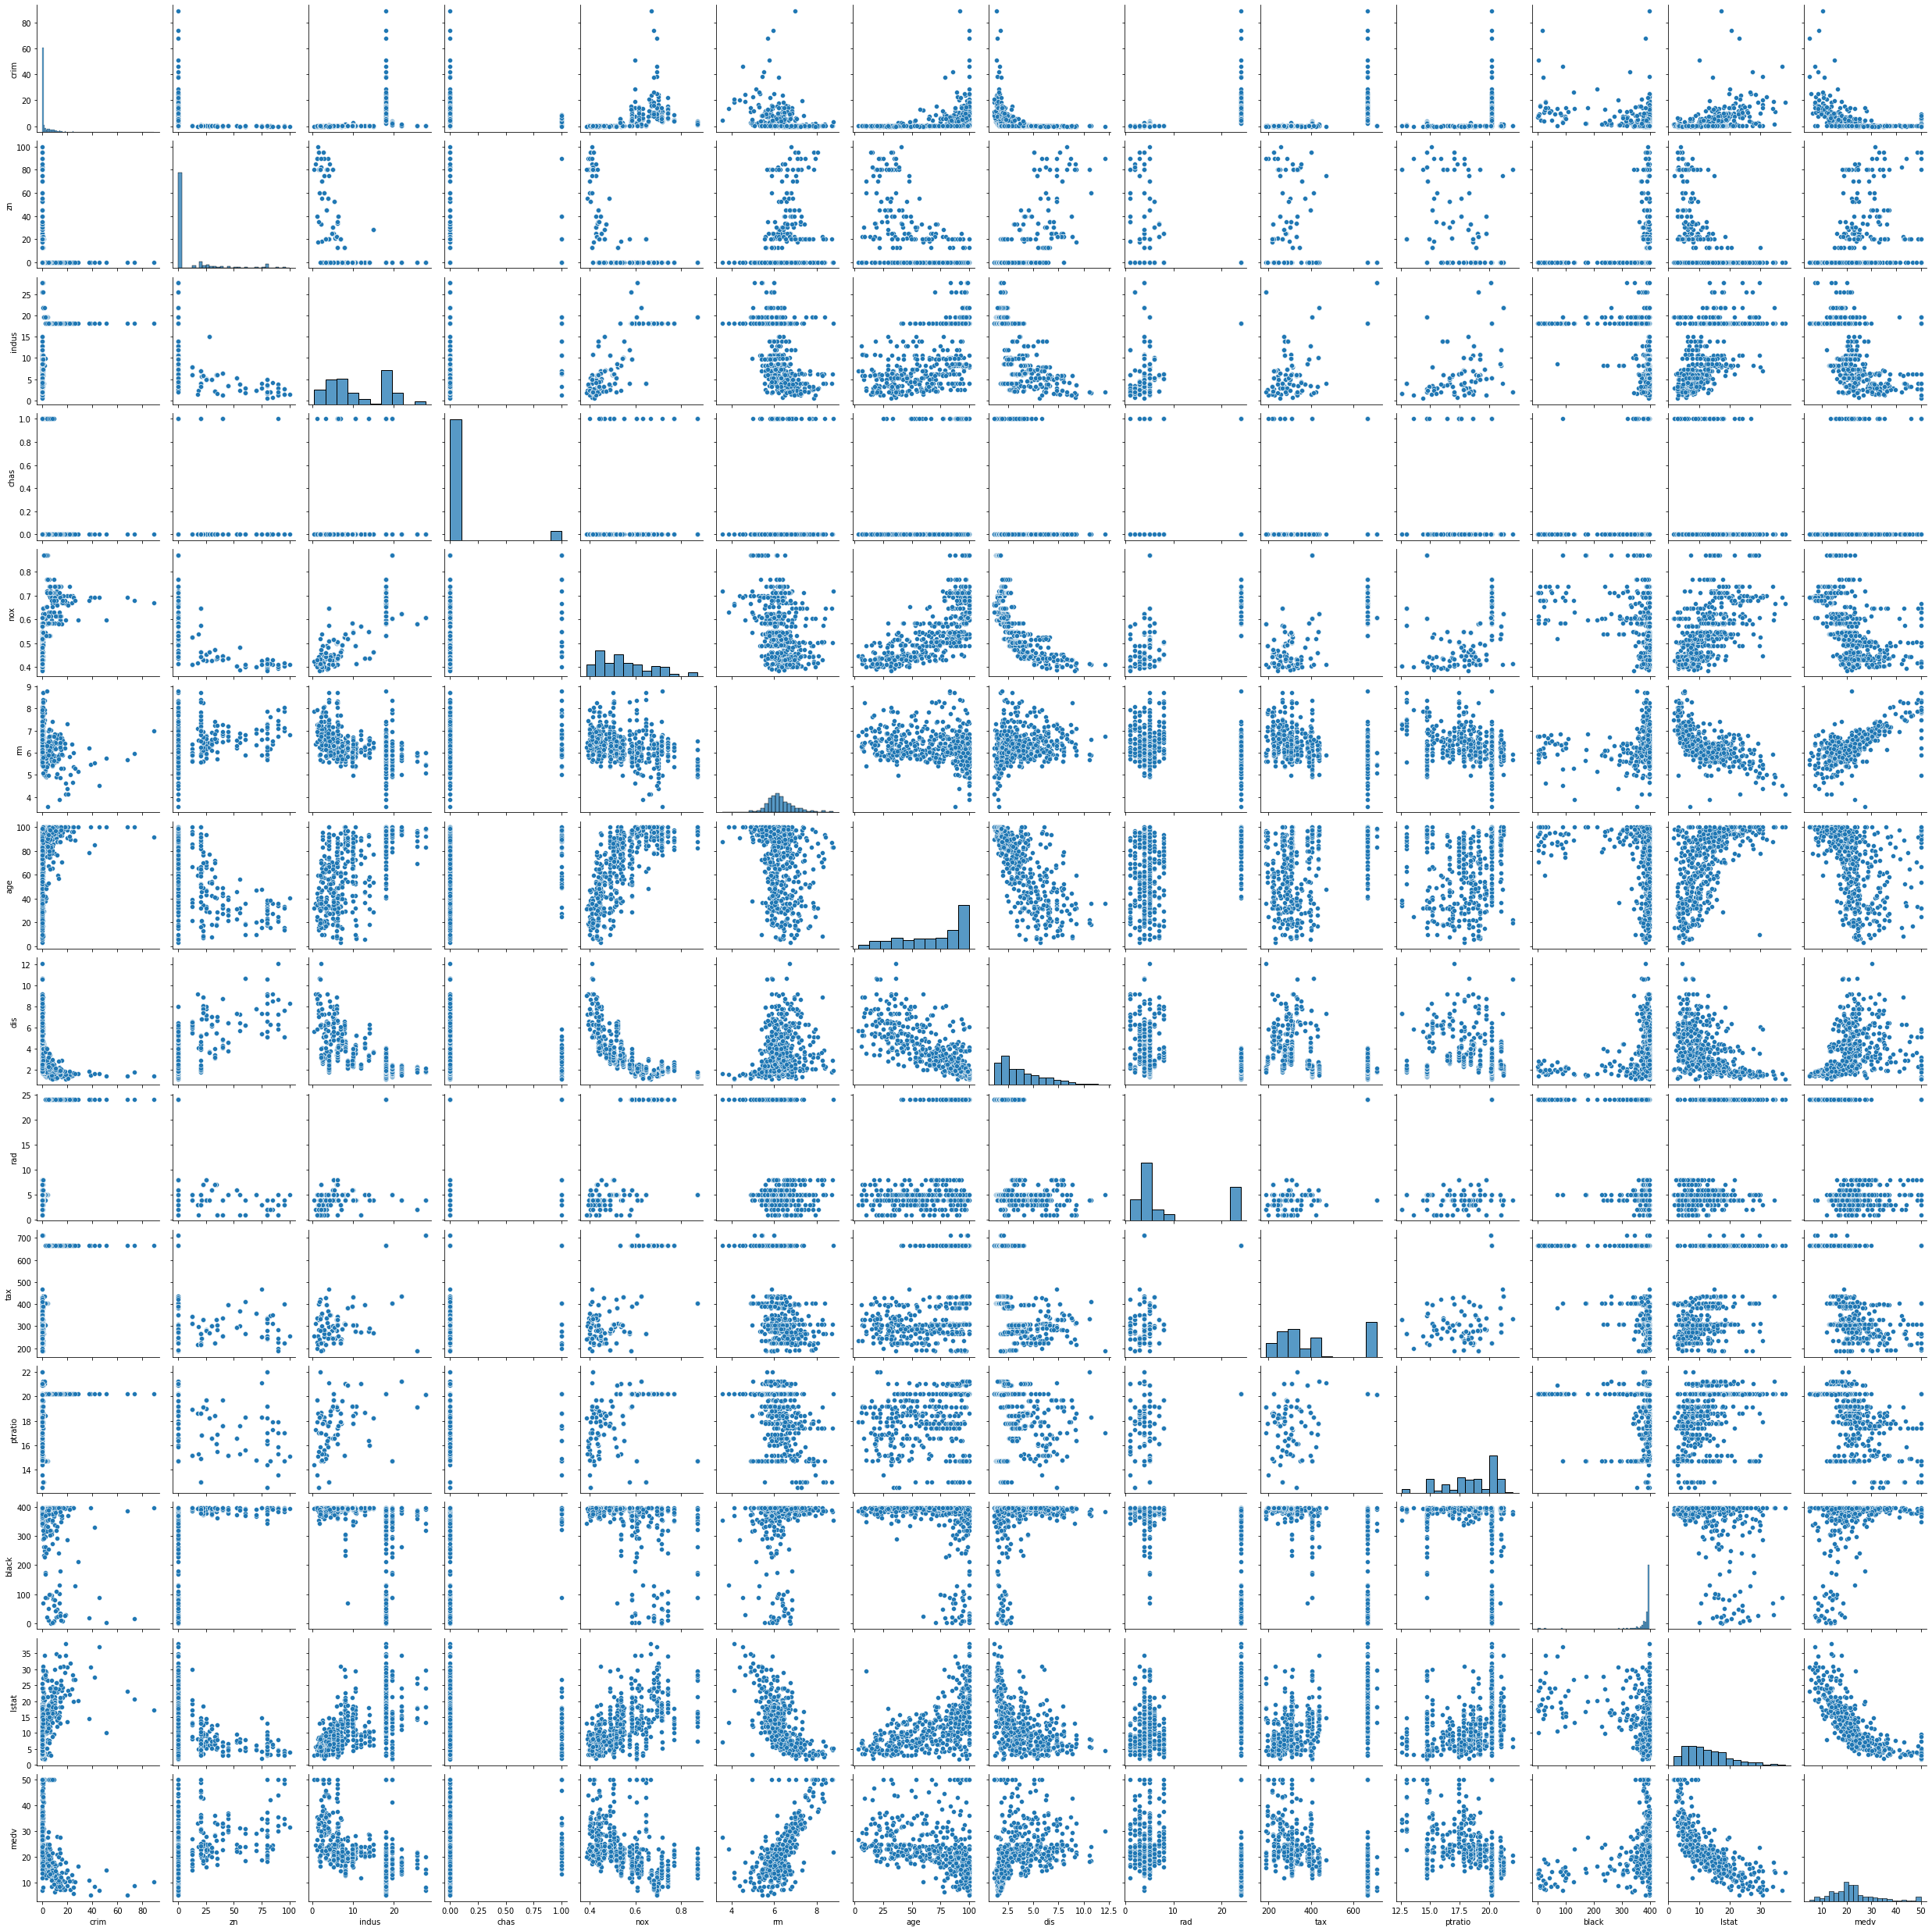

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


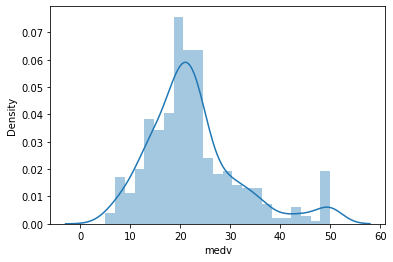

In [ ]:
price = data['medv']
sns.distplot(price)

In [ ]:
# Outlier Index

def get_outlier(df=None, column=None, weight=2.0):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 다중선형획귀분석

## 3개의 변수만 활용한 모형

In [ ]:
X = data[['rm', 'lstat', 'ptratio']]
y = data['medv']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(train_X, train_y)

# Inference
train_pred = model.predict(train_X)
val_pred = model.predict(val_X)

# RMSE
train_rmse = mean_squared_error(train_y, train_pred, squared = False)
val_rmse = mean_squared_error(val_y, val_pred, squared = False)

# r2 score
train_r2 = r2_score(train_y, train_pred)
val_r2 = r2_score(val_y, val_pred) 


print('MAE & r2 score for train/val data set'), 
print('---------------------------------------------'), 
print("RMSE score:{:.3f} , r2 score:{:.3f} for train dataset".format(train_rmse, train_r2)), 
print("RMSE score:{:.3f} , r2 score:{:.3f} for validation dataset".format(val_rmse, val_r2))

MAE & NMAE & r2 score for train/val data set
---------------------------------------------
RMSE score:5.219 , r2 score:0.686 for train dataset
RMSE score:5.207 , r2 score:0.630 for validation dataset


## 모든 변수를 사용한 모형

In [ ]:
X = data.drop('medv', axis = 1)
y = data['medv']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(train_X, train_y)

# Inference
train_pred = model.predict(train_X)
val_pred = model.predict(val_X)

# RMSE
train_rmse = mean_squared_error(train_y, train_pred, squared = False)
val_rmse = mean_squared_error(val_y, val_pred, squared = False)

# r2 score
train_r2 = r2_score(train_y, train_pred)
val_r2 = r2_score(val_y, val_pred) 


print('MAE & r2 score for train/val data set'), 
print('---------------------------------------------'), 
print("RMSE score:{:.3f} , r2 score:{:.3f} for train dataset".format(train_rmse, train_r2)), 
print("RMSE score:{:.3f} , r2 score:{:.3f} for validation dataset".format(val_rmse, val_r2))

MAE & NMAE & r2 score for train/val data set
---------------------------------------------
RMSE score:4.652 , r2 score:0.751 for train dataset
RMSE score:4.929 , r2 score:0.669 for validation dataset


## 교차 검증

In [ ]:
cross_score = cross_val_score(model, train_X, train_y, scoring='neg_mean_squared_error', cv=10) 
rmse_score = np.sqrt(-cross_score)

print('개별 RMSE 점수 :', np.round(rmse_score, 3))
print('평균 RMSE 점수 :', np.round(np.mean(rmse_score), 3))

개별 RMSE 점수 : [3.763 4.251 5.347 6.715 4.593 5.174 4.431 4.578 3.672 5.77 ]
평균 RMSE 점수 : 4.829


# 다항회귀분석

## 2차 다항회귀분석

In [ ]:
X = data.drop('medv', axis = 1)
y = data['medv']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

poly2_features = PolynomialFeatures(degree = 2)
train_X_poly2 = poly2_features.fit_transform(train_X)

poly2_model = LinearRegression()
poly_model.fit(train_X_poly2, train_y)

poly2_train_pred = poly_model.predict(train_X_poly2)
poly2_val_pred = poly_model.predict(poly2_features.transform(val_X))

# RMSE
poly2_train_rmse = mean_squared_error(train_y, poly2_train_pred, squared = False)
poly2_val_rmse = mean_squared_error(val_y, poly2_val_pred, squared = False)

# r2 score
poly2_train_r2 = r2_score(train_y, poly2_train_pred)
poly2_val_r2 = r2_score(val_y, poly2_val_pred) 


print('설명 변수의 개수', len(poly_model.coef_))
print('MAE & r2 score for train/val data set')
print('---------------------------------------------')
print("RMSE score:{:.3f} , r2 score:{:.3f} for train dataset".format(poly2_train_rmse, poly2_train_r2))
print("RMSE score:{:.3f} , r2 score:{:.3f} for validation dataset".format(poly2_val_rmse, poly2_val_r2))

설명 변수의 개수 105
MAE & NMAE & r2 score for train/val data set
---------------------------------------------
RMSE score:2.305 , r2 score:0.939 for train dataset
RMSE score:3.766 , r2 score:0.807 for validation dataset


# 3차 다항회귀분석

In [ ]:
# poly2_cross_score = cross_val_score(poly2_model, train_X, train_y, scoring='neg_mean_squared_error', cv=10) 
# poly2_rmse_score = np.sqrt(-poly2_cross_score)

# print('개별 RMSE 점수 :', np.round(poly2_rmse_score, 3))
# print('평균 RMSE 점수 :', np.round(np.mean(poly2_rmse_score), 3))

In [ ]:
X = data.drop('medv', axis = 1)
y = data['medv']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

poly3_features = PolynomialFeatures(degree = 3)
train_X_poly3 = poly3_features.fit_transform(train_X)

poly3_model = LinearRegression()
poly_model.fit(train_X_poly3, train_y)

poly3_train_pred = poly_model.predict(train_X_poly3)
poly3_val_pred = poly_model.predict(poly3_features.transform(val_X))

# RMSE
poly3_train_rmse = mean_squared_error(train_y, poly3_train_pred, squared = False)
poly3_val_rmse = mean_squared_error(val_y, poly3_val_pred, squared = False)

# r2 score
poly3_train_r2 = r2_score(train_y, poly3_train_pred)
poly3_val_r2 = r2_score(val_y, poly3_val_pred) 


print('설명 변수의 개수', len(poly_model.coef_))
print('MAE & r2 score for train/val data set')
print('---------------------------------------------')
print("RMSE score:{:.3f} , r2 score:{:.3f} for train dataset".format(poly3_train_rmse, poly3_train_r2))
print("RMSE score:{:.3f} , r2 score:{:.3f} for validation dataset".format(poly3_val_rmse, poly3_val_r2))

설명 변수의 개수 560
MAE & NMAE & r2 score for train/val data set
---------------------------------------------
RMSE score:0.000 , r2 score:1.000 for train dataset
RMSE score:360.344 , r2 score:-1769.644 for validation dataset


# 규제선형모형

In [ ]:
X = data.drop('medv', axis = 1)
y = data['medv']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

lasso_alpha = 1
lasso = Lasso(alpha = lasso_alpha)
lasso.fit(train_X, train_y)

train_pred = lasso.predict(train_X)
val_pred = lasso.predict(val_X)

train_rmse = mean_squared_error(train_y, train_pred, squared = False)
val_rmse = mean_squared_error(val_y, val_pred, squared = False)

train_r2 = r2_score(train_y, train_pred)
val_r2 = r2_score(val_y, val_pred) 

print('RMSE & r2 score for train/val data set')
print('---------------------------------------------')
print("RMSE score:{:.3f} , r2 score:{:.3f} for train dataset".format(train_rmse, train_r2))
print("RMSE score:{:.3f} , r2 score:{:.3f} for validation dataset".format(val_rmse, val_r2))

RMSE & r2 score for train/val data set
---------------------------------------------
RMSE score:5.140 , r2 score:0.696 for train dataset
RMSE score:4.941 , r2 score:0.667 for validation dataset


# 회귀 트리 모형

In [ ]:
rfr = RandomForestRegressor(random_state = 42)
xgbr = XGBRegressor(random_state = 42, objective = 'reg:squarederror')
lgbr = LGBMRegressor(random_state = 42)
gbr = GradientBoostingRegressor(random_state = 42)

tree_model = [rfr, xgbr, lgbr, gbr]

In [ ]:
X = data.drop('medv', axis = 1)
y = data['medv']

for model in tree_model:
    kfold = KFold(shuffle = True, random_state = 42, n_splits = 10)

    cross_score = cross_val_score(model, train_X, train_y, scoring='neg_mean_squared_error', cv=10) 
    rmse_score = np.sqrt(-cross_score)

    print('#########', model, '########')
    print('개별 RMSE 점수 :', np.round(rmse_score, 3))
    print('평균 RMSE 점수 :', np.round(np.mean(rmse_score), 3))
    print(' ')

######### RandomForestRegressor(random_state=42) ########
개별 RMSE 점수 : [3.21  3.429 2.878 5.493 4.75  2.908 3.826 2.739 2.528 4.804]
평균 RMSE 점수 : 3.656
 
######### XGBRegressor(objective='reg:squarederror', random_state=42) ########
개별 RMSE 점수 : [3.398 2.736 2.816 5.29  3.725 3.056 3.873 2.252 2.536 4.328]
평균 RMSE 점수 : 3.401
 
######### LGBMRegressor(random_state=42) ########
개별 RMSE 점수 : [3.35  3.442 2.888 4.545 4.551 2.402 3.609 2.764 2.272 5.143]
평균 RMSE 점수 : 3.497
 
######### GradientBoostingRegressor(random_state=42) ########
개별 RMSE 점수 : [3.23  2.872 2.411 5.24  3.885 2.97  3.791 2.264 2.51  4.094]
평균 RMSE 점수 : 3.327
 


# 회귀 계수 및 해석

## 변수 중요도에 따른 설명 변수 채택

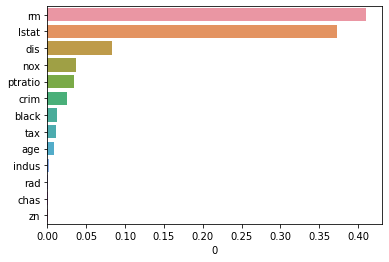

In [ ]:
gbr.fit(X, y)
feature_importance = pd.DataFrame(data = gbr.feature_importances_, index = X.columns)
feature_importance = feature_importance.sort_values(ascending=False, by = 0)

sns.barplot(x = feature_importance[0], y = feature_importance.index)

In [ ]:
X = data[['rm', 'lstat', 'dis', 'nox', 'ptratio']]
y = data['medv']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state =42)

model = LinearRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
val_pred = model.predict(val_X)

In [ ]:
coeff = pd.Series(data=np.round(model.coef_, 3), index=X.columns)
coeff.sort_values(ascending=False)

rm          4.544
lstat      -0.581
ptratio    -0.995
dis        -1.223
nox       -17.975
dtype: float64

In [ ]:
model.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

## 통계적 검정

In [ ]:
train_temp = train_X[['rm', 'lstat', 'dis', 'nox', 'ptratio']]
train_temp = sm.add_constant(train_temp)
ols = sm.OLS(train_y, train_temp).fit()
ols.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     201.6
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.10e-106
Time:                        06:53:53   Log-Likelihood:                -1220.1
No. Observations:                 404   AIC:                             2452.
Df Residuals:                     398   BIC:                             2476.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2196      5.123      6.680      0.000      24.149      44.290
rm             4.5442      0.456      9.958      0.000       3.647       5.441
lstat         -0.5812      0.054    -10.745      0.000      -0.688      -0.475
dis           -1.2233      0.188     -6.514      0.000      -1.592      -0.854
nox          -17.9752      3.643     -4.935      0.000     -25.136     -10.814
ptratio       -0.9947      0.123     -8.085      0.000      -1.237      -0.753
==============================================================================
Omnibus:                      142.162   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              643.718
Skew:                           1.471   Prob(JB):                    1.65e-140
Kurtosis:                       8.439   Cond. No.                         539.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""